In [1]:
import pandas as pd

In [2]:
sample_submission = pd.read_csv('../../data/sample_submission.csv')

In [3]:
seen_pred = pd.read_csv('seen.csv')
unseen_pred = pd.read_csv('unseen.csv')

In [4]:
seen_pred

,ID,score
0,df5ce90323/2191,7.729634
1,fd47680337/12355,7.565985
2,8bfc6cea02/3287,2.830617
3,5ba4de2706/5114,8.721314
4,6f78771003/33966,5.653280
...,...,...
22124,513878a55e/2501,5.798763
22125,f60d21c6ff/34914,7.509533
22126,76b6afecea/1606,9.896216
22127,ae8792e8c9/14467,7.178465


In [5]:
unseen_pred

,ID,score
0,3c42dd1ca5/37438,6.560495
1,f7086fba78/30694,6.584927
2,447c01a6a6/4304,8.119726
3,a3d91316d0/31798,7.310472
4,36c80f014d/7079,6.992006
...,...,...
3036,e0f631a0ae/12175,7.642754
3037,ae9a32c26b/94,7.130671
3038,aa8ff6b83f/28223,8.744216
3039,fd08ce7650/1457,7.217660


In [6]:
sample_submission

,ID,score
0,df5ce90323/2191,5
1,fd47680337/12355,5
2,8bfc6cea02/3287,5
3,5ba4de2706/5114,5
4,6f78771003/33966,5
...,...,...
25165,f60d21c6ff/34914,5
25166,1efa7f7adc/9989,5
25167,76b6afecea/1606,5
25168,ae8792e8c9/14467,5


In [7]:
sample_seen = pd.merge(
    sample_submission, seen_pred, on="ID",  how='left'
)[["ID", "score_y"]].rename(columns={"score_y": "score"})

In [8]:
final_pred = pd.merge(
    sample_seen, unseen_pred, on="ID",  how='left'
)

In [9]:
final_pred

,ID,score_x,score_y
0,df5ce90323/2191,7.729634,NaN
1,fd47680337/12355,7.565985,NaN
2,8bfc6cea02/3287,2.830617,NaN
3,5ba4de2706/5114,8.721314,NaN
4,6f78771003/33966,5.653280,NaN
...,...,...,...
25165,f60d21c6ff/34914,7.509533,NaN
25166,1efa7f7adc/9989,NaN,8.790896
25167,76b6afecea/1606,9.896216,NaN
25168,ae8792e8c9/14467,7.178465,NaN


In [10]:
final_pred["score"] = final_pred["score_x"].fillna(final_pred["score_y"])

In [11]:
final_pred[['ID', 'score']].to_csv('result.csv', index=False)

In [12]:
import seaborn as sns

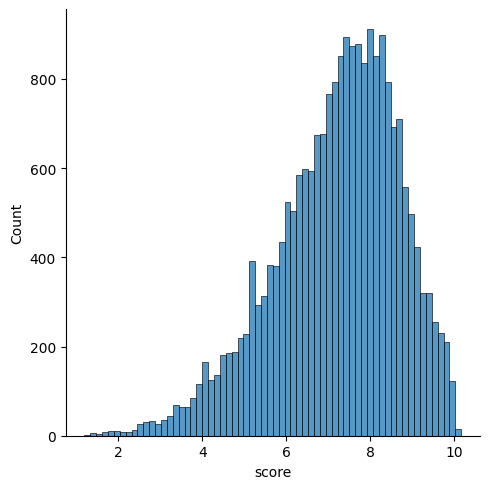

In [13]:
sns.displot(seen_pred['score'])

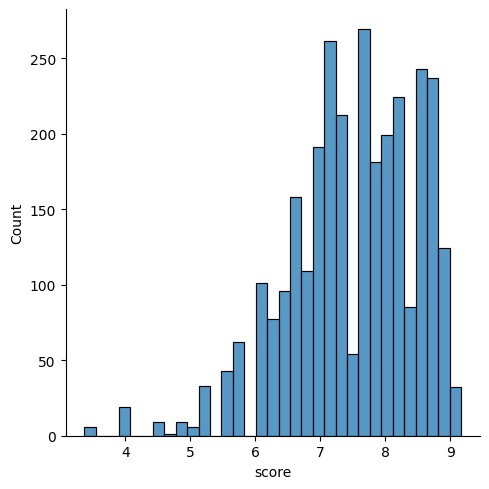

In [14]:
sns.displot(unseen_pred['score'])

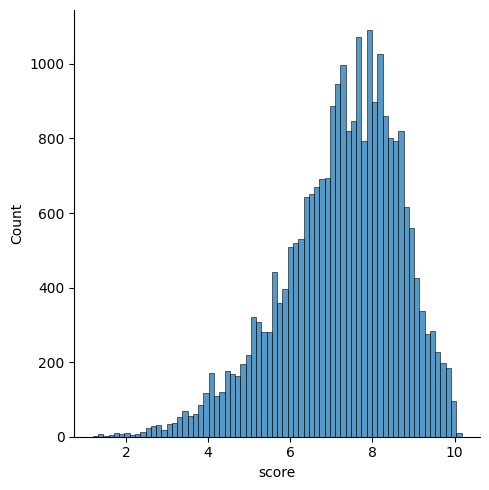

In [15]:
sns.displot(final_pred['score'])

In [16]:
label = pd.read_csv('../../data/solution.csv')

In [17]:
label['seen'] = label['ID'].isin(seen_pred['ID'].values)

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
mean_squared_error(label[label['seen']]['score'], seen_pred['score'])

3.7936659037035905

In [20]:
mean_squared_error(label[~label['seen']]['score'], unseen_pred['score'])

4.860182663628279

In [21]:
!kaggle competitions submit -c trap-competetion-2023-summer -f result.csv -m ""

alias: -m: unknown option
100%|█████████████████████████████████████████| 842k/842k [00:03<00:00, 263kB/s]
Successfully submitted to traPコンペ 2023 夏